Using TensorFlow backend.


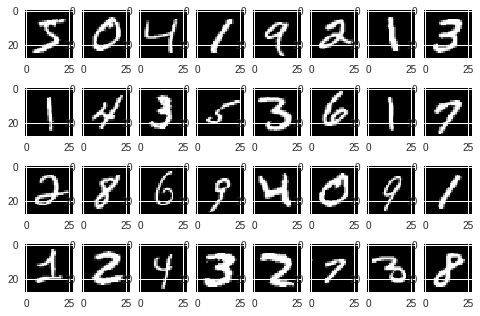

In [2]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot

#MNISTデータの読み込み
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#データを出力してみる
for i in range(0,32):
  pyplot.subplot(4, 8, i + 1)
  pyplot.imshow(X_train[i], cmap='gray')
  
pyplot.show()

In [3]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

#データを一次元の配列に変換して正規化
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

#データを学習
clf = svm.LinearSVC()
clf.fit(X_train, Y_train)

#予測して精度を確認する
Y_pred = clf.predict(X_test)
print("精度:", accuracy_score(Y_test, Y_pred))

精度: 0.9184


In [6]:
from sklearn.externals import joblib
joblib.dump(clf, 'sudoku.pkl')

['sudoku.pkl']

In [8]:
! pip install nose

    100% |████████████████████████████████| 163kB 6.0MB/s 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils.testing import all_estimators


#データを学習
warnings.filterwarnings("ignore")
allAlgorithms = all_estimators(type_filter = "classifier")

for (name, algorithm) in allAlgorithms:
  clf = algorithm()
  
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(name, "の精度:", accuracy_score(Y_test, Y_pred))

AdaBoostClassifier の精度: 0.7299
BaggingClassifier の精度: 0.9484
BernoulliNB の精度: 0.8413
CalibratedClassifierCV の精度: 0.866
DecisionTreeClassifier の精度: 0.8794
ExtraTreeClassifier の精度: 0.8279
ExtraTreesClassifier の精度: 0.9526
GaussianNB の精度: 0.5558


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#グリッドサーチで利用するパラメーターを指定
parameters = [
    {"C": [1, 10, 100, 1000], "kernel":["linear"]},
    {"C": [1, 10, 100, 1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel":["sigmoid"], "gamma":[0.001, 0.0001]}
]

#グリッドサーチを行う
kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV( SVC(), parameters, cv=kfold_cv)
clf.fit(X_train, Y_train)
print("最適なパラメーター = ", clf.best_estimator_)

#最適なパラメーターで評価
Y_pred = clf.predict(X_test)
print("評価時の正答率 = ", accuracy_score(Y_test, Y_pred))